# import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# gini impurity and information gain explanation

Below is a **clear, step-by-step explanation** of **Gini Impurity** and **Information Gain**, with **numerical examples** as used in **decision trees** (CART, ID3, C4.5).

---

## 1️⃣ Gini Impurity

### What it measures

Gini impurity measures **how often a randomly chosen sample would be misclassified** if it were randomly labeled according to the class distribution in a node.

* **Lower Gini = purer node**
* **Gini = 0** → all samples belong to one class

### Formula

$$
\text{Gini} = 1 - \sum_{i=1}^{C} p_i^2
$$
where:

* (p_i) = proportion of class (i)
* (C) = number of classes

---

### 🔢 Example 1: Binary classification

Suppose a node has **10 samples**:

| Class | Count |
| ----- | ----- |
| Yes   | 6     |
| No    | 4     |

$$
p_{\text{Yes}} = \frac{6}{10} = 0.6,\quad
p_{\text{No}} = \frac{4}{10} = 0.4
$$

$$
\text{Gini} = 1 - (0.6^2 + 0.4^2)
= 1 - (0.36 + 0.16)
= 0.48
$$

---

### 🔢 Example 2: Perfectly pure node

| Class | Count |
| ----- | ----- |
| Yes   | 10    |
| No    | 0     |

$$
\text{Gini} = 1 - (1^2 + 0^2) = 0
$$

---

### 🔢 Example 3: Maximum impurity (binary)

| Class | Count |
| ----- | ----- |
| Yes   | 5     |
| No    | 5     |

$$
\text{Gini} = 1 - (0.5^2 + 0.5^2)
= 0.5
$$

---

## 2️⃣ Information Gain (based on Entropy)

### Entropy: Measure of uncertainty

Entropy measures **how mixed the classes are**.

### Formula

$$
\text{Entropy} = -\sum_{i=1}^{C} p_i \log_2(p_i)
$$

* Entropy = 0 → pure node
* Entropy = 1 (binary) → maximum uncertainty

---

### 🔢 Example: Parent node entropy

Same data as before:

| Class | Count |
| ----- | ----- |
| Yes   | 6     |
| No    | 4     |

$$
\text{Entropy} =

* (0.6\log_2 0.6 + 0.4\log_2 0.4)
$$

$$
= - (0.6 \cdot -0.737 + 0.4 \cdot -1.322)
$$

$$
= 0.971
$$

---

## 3️⃣ Information Gain

### What it measures

Information Gain measures **how much entropy decreases after a split**.

$$
\text{Information Gain} =
\text{Entropy(parent)} -
\sum_{k} \frac{N_k}{N} \cdot \text{Entropy(child}_k\text{)}
$$

---

### 🔢 Example: Splitting a node

Suppose we split the 10 samples into two child nodes:

#### Child 1

| Class | Count |
| ----- | ----- |
| Yes   | 4     |
| No    | 1     |

Entropy:

$$
* (0.8\log_2 0.8 + 0.2\log_2 0.2) = 0.722
$$

#### Child 2

| Class | Count |
| ----- | ----- |
| Yes   | 2     |
| No    | 3     |

Entropy:
$$

* (0.4\log_2 0.4 + 0.6\log_2 0.6) = 0.971
$$

---

### Weighted entropy after split

$$
\frac{5}{10} \cdot 0.722 + \frac{5}{10} \cdot 0.971
= 0.846
$$

---

### Information Gain

$$
\text{IG} = 0.971 - 0.846 = 0.125
$$

➡️ **Higher Information Gain = better split**

---

## 4️⃣ Gini vs Information Gain

| Aspect         | Gini Impurity                  | Information Gain          |
| -------------- | ------------------------------ | ------------------------- |
| Used by        | CART                           | ID3, C4.5                 |
| Computation    | Faster                         | Slower (log)              |
| Bias           | Less biased toward many splits | Biased toward many values |
| Range (binary) | 0 → 0.5                        | 0 → 1                     |

---

## 5️⃣ Intuition (Quick Summary)

* **Gini**: *How often will I be wrong if I guess randomly?*
* **Entropy**: *How much disorder is in the node?*
* **Information Gain**: *How much uncertainty did this split remove?*

---



Perfect — let’s do **one complete numeric example**, slowly, for **both Gini impurity and Information Gain**, using the **same dataset**, so you can see exactly **how a decision tree chooses a split**.

---

# Dataset (Parent Node)

Suppose we have **10 training samples** with a binary target **(Yes / No)**.

| Sample | Feature: Weather | Class |
| ------ | ---------------- | ----- |
| 1      | Sunny            | Yes   |
| 2      | Sunny            | Yes   |
| 3      | Sunny            | No    |
| 4      | Sunny            | No    |
| 5      | Sunny            | Yes   |
| 6      | Rainy            | No    |
| 7      | Rainy            | No    |
| 8      | Rainy            | No    |
| 9      | Rainy            | Yes   |
| 10     | Rainy            | No    |

---

## Step 1️⃣ Class distribution at parent node

| Class | Count |
| ----- | ----- |
| Yes   | 4     |
| No    | 6     |

---

# PART A: Using **Gini Impurity**

---

## Step 2️⃣ Gini at parent node

[
p(\text{Yes}) = 4/10 = 0.4
\quad
p(\text{No}) = 6/10 = 0.6
]

[
\text{Gini}_{parent} = 1 - (0.4^2 + 0.6^2)
= 1 - (0.16 + 0.36)
= 0.48
]

---

## Step 3️⃣ Try a split on **Weather**

### Child Node 1: Sunny

| Class | Count |
| ----- | ----- |
| Yes   | 3     |
| No    | 2     |

[
\text{Gini}_{sunny} = 1 - (0.6^2 + 0.4^2) = 0.48
]

---

### Child Node 2: Rainy

| Class | Count |
| ----- | ----- |
| Yes   | 1     |
| No    | 4     |

[
\text{Gini}_{rainy} = 1 - (0.2^2 + 0.8^2)
= 1 - (0.04 + 0.64)
= 0.32
]

---

## Step 4️⃣ Weighted Gini after split

[
\text{Gini}_{after} =
\frac{5}{10}(0.48) + \frac{5}{10}(0.32)
]

[
= 0.24 + 0.16 = 0.40
]

---

## Step 5️⃣ Gini reduction (optional)

[
\text{Gini reduction} = 0.48 - 0.40 = 0.08
]

➡️ **Lower Gini after split = better split**

---

# PART B: Using **Information Gain**

---

## Step 6️⃣ Entropy at parent node

[
\text{Entropy}_{parent}
= - (0.4\log_2 0.4 + 0.6\log_2 0.6)
]

[
= - (0.4 \cdot -1.322 + 0.6 \cdot -0.737)
]

[
= 0.971
]

---

## Step 7️⃣ Entropy of child nodes

### Sunny node

[
\text{Entropy}_{sunny}
= - (0.6\log_2 0.6 + 0.4\log_2 0.4)
= 0.971
]

---

### Rainy node

[
\text{Entropy}_{rainy}
= - (0.2\log_2 0.2 + 0.8\log_2 0.8)
= 0.722
]

---

## Step 8️⃣ Weighted entropy after split

[
\text{Entropy}_{after}
= \frac{5}{10}(0.971) + \frac{5}{10}(0.722)
]

[
= 0.846
]

---

## Step 9️⃣ Information Gain

[
\text{IG} = 0.971 - 0.846 = 0.125
]

➡️ **Higher Information Gain = better split**

---

# Final Decision at This Node

| Criterion        | Result    |
| ---------------- | --------- |
| Gini after split | **0.40**  |
| Information Gain | **0.125** |

If this split has:

* **Lowest Gini** among candidates → choose it
* **Highest IG** among candidates → choose it

---

## Key Takeaways (very important)

1️⃣ The tree **tries many splits**
2️⃣ For each split, it computes:

* Gini **or**
* Information Gain
  3️⃣ It chooses the **best-scoring split**
  4️⃣ Then repeats this process recursively

---

## One-line exam answer ✅

> **Decision trees use Gini impurity or Information Gain to evaluate candidate splits and choose the one that produces the purest child nodes.**

---



In [2]:
df = pd.read_csv("heart_cleveland_upload.csv")
df.head(1).T

,0
age,69.0
sex,1.0
cp,0.0
trestbps,160.0
chol,234.0
fbs,1.0
restecg,2.0
thalach,131.0
exang,0.0
oldpeak,0.1


In [3]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

# split train test data

In [4]:
train_data, test_data = train_test_split(df, test_size=30, random_state=42)

print(f"train_data.shape: {train_data.shape}")
print(f"test_data.shape: {test_data.shape}")

train_data.shape: (267, 14)
test_data.shape: (30, 14)


# train random forest

In [5]:
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, random_state=42)
rf_clf.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])

RandomForestClassifier(max_depth=4, random_state=42)

In [6]:
rf_clf.score(train_data.iloc[:, :-1], train_data.iloc[:, -1])

0.8951310861423221

In [7]:
rf_clf.score(test_data.iloc[:, :-1], test_data.iloc[:, -1])

0.8333333333333334

افت دقت آنچنان زیاد نیست که تعبیر به بیش برازش کنیم.

# plot importance of features

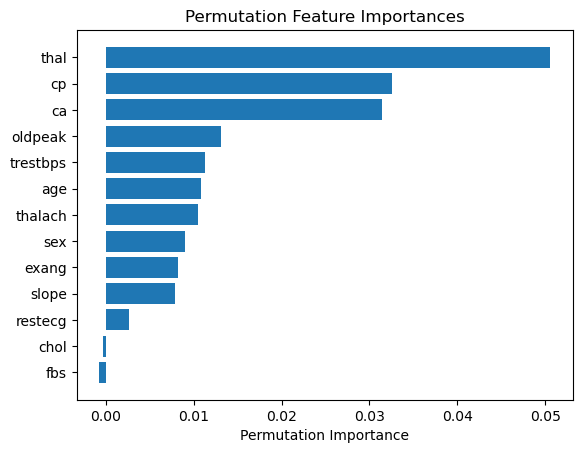

In [9]:
from sklearn.inspection import permutation_importance

feature_names = train_data.columns[:-1]

result = permutation_importance(
    rf_clf, train_data.iloc[:, :-1], train_data.iloc[:, -1], n_repeats=10, random_state=42
)

sorted_idx = result.importances_mean.argsort()

plt.figure()
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importances")
plt.show()


**Random Forest** is an **ensemble machine learning algorithm** that builds **many decision trees** and combines their predictions to make a final decision.

---

## What is a Decision Tree?

A **decision tree** is a model that:

* Splits data step by step based on feature values
* Is easy to understand and visualize
* Can fit training data extremely well

⚠️ **Problem:**
A single decision tree often **overfits**, meaning it learns noise and small details in the training data instead of general patterns.

---

## What is a Random Forest?

A **random forest**:

* Builds **many decision trees**
* Each tree is trained on a **random subset of the data** (bootstrapping)
* Each split considers only a **random subset of features**
* Combines all trees’ outputs:

  * **Classification:** majority vote
  * **Regression:** average prediction

---

## Why Random Forest Is Less Likely to Overfit Than a Decision Tree

### 1. **Averaging Reduces Variance**

* Individual decision trees have **high variance**
* Random forest averages many trees → **errors cancel out**
* Result: more stable and reliable predictions

---

### 2. **Random Data Sampling (Bagging)**

* Each tree sees a **different subset of training data**
* Trees make different mistakes
* Overfitting patterns learned by one tree are not repeated by all trees

---

### 3. **Random Feature Selection**

* At each split, only a **random subset of features** is considered
* Prevents trees from always picking the strongest feature
* Encourages **diversity** among trees

---

### 4. **No Single Tree Dominates**

* A decision tree relies on one structure
* Random forest combines many weakly correlated trees
* This reduces the impact of noisy splits

---

## Simple Intuition

Think of it as:

* **Decision Tree:** One expert making a decision (can be biased)
* **Random Forest:** A committee of experts voting (more balanced)

---

## Summary Table

| Model         | Overfitting Risk | Reason                     |
| ------------- | ---------------- | -------------------------- |
| Decision Tree | High             | Learns noise, too flexible |
| Random Forest | Low              | Averaging + randomness     |

---

### Key Takeaway

👉 **Random forests reduce overfitting by combining multiple diverse decision trees**, making them more robust and generalizable than a single decision tree.


# plot confusion matrix

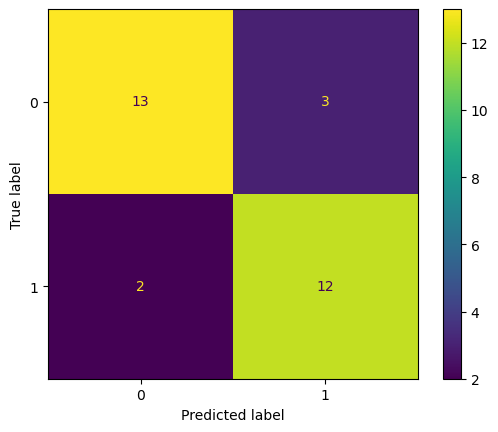

In [10]:
ConfusionMatrixDisplay.from_estimator(
    rf_clf,
    test_data.iloc[:, :-1],
    test_data.iloc[:, -1]
)

plt.show()

از دست دادن بیمار. چون با تشخیص بیمار بودن یک فرد سالم میتوان از او آزمایش دوباره گرفت جهت اطمینان. ولی معمولا وقتی فردی سالم تشخیص داده میشود از او آزمایش دیگری گرفته نمیشود.